In [73]:
import pandas as pd
from src.visualisation import (
    plot_histogram,
    plot_pie,
    plot_box,
    plot_bar,
    plot_scatter,
    plot_sunburst
)


In [74]:
xls = 'data/Customer_Churn_Data_Large.xlsx'

In [75]:
customer_demographics_df = pd.read_excel(xls, sheet_name='Customer_Demographics')
transaction_history_df = pd.read_excel(xls, sheet_name='Transaction_History')
customer_service_df = pd.read_excel(xls, sheet_name='Customer_Service')
online_activity_df = pd.read_excel(xls, sheet_name='Online_Activity')
churn_status_df = pd.read_excel(xls, sheet_name='Churn_Status')


In [113]:
def print_missing_percent(df, name):
    print(f"\n{name} Missing Percentage:")
    missing_percent = df.isnull().mean() * 100
    print(missing_percent)

print("Customer Demographics Info:")
print(customer_demographics_df.info())
print(customer_demographics_df.columns)
print(customer_demographics_df.describe(include='all'))
print_missing_percent(customer_demographics_df, "Customer Demographics")

print("\nTransaction History Info:")
print(transaction_history_df.info())
print(transaction_history_df.describe(include='all'))
print(transaction_history_df.columns)
print_missing_percent(transaction_history_df, "Transaction History")

print("\nCustomer Service Info:")
print(customer_service_df.info())
print(customer_service_df.describe(include='all'))
print(customer_service_df.columns)
print_missing_percent(customer_service_df, "Customer Service")

print("\nOnline Activity Info:")
print(online_activity_df.info())
print(online_activity_df.describe(include='all'))
print(online_activity_df.columns)
print_missing_percent(online_activity_df, "Online Activity")

print("\nChurn Status Info:")
print(churn_status_df.info())
print(churn_status_df.describe(include='all'))
print(churn_status_df.columns)
print_missing_percent(churn_status_df, "Churn Status")

Customer Demographics Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CustomerID     1000 non-null   int64 
 1   Age            1000 non-null   int64 
 2   Gender         1000 non-null   object
 3   MaritalStatus  1000 non-null   object
 4   IncomeLevel    1000 non-null   object
dtypes: int64(2), object(3)
memory usage: 39.2+ KB
None
Index(['CustomerID', 'Age', 'Gender', 'MaritalStatus', 'IncomeLevel'], dtype='object')
         CustomerID          Age Gender MaritalStatus IncomeLevel
count   1000.000000  1000.000000   1000          1000        1000
unique          NaN          NaN      2             4           3
top             NaN          NaN      F       Widowed        High
freq            NaN          NaN    513           276         349
mean     500.500000    43.267000    NaN           NaN         NaN
std      288.819436    15.2

In [77]:
# Merging the customer demographics and churn status DataFrames
customeer_demo_df = pd.merge(customer_demographics_df, churn_status_df, on='CustomerID', how='left')

# Filtering where ChurnStatus is 1 (i.e., customers who have churned)
customeer_demo_df = customeer_demo_df[customeer_demo_df['ChurnStatus'] == 1]

# Display the first few rows of the filtered DataFrame
# print(customeer_demo_df.head())


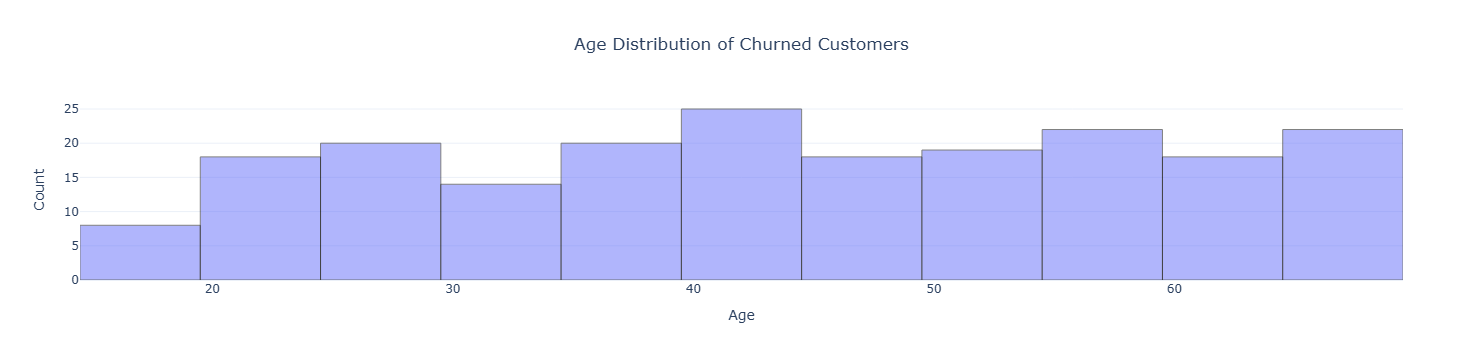

In [78]:
# Histogram for Age Distribution of Churned Customers
fig = plot_histogram(churned_customers_df, 
                     x_column='Age', 
                     title='Age Distribution of Churned Customers', 
                     x_label='Age', 
                     y_label='Count', 
                     barmode='overlay')
fig.show()


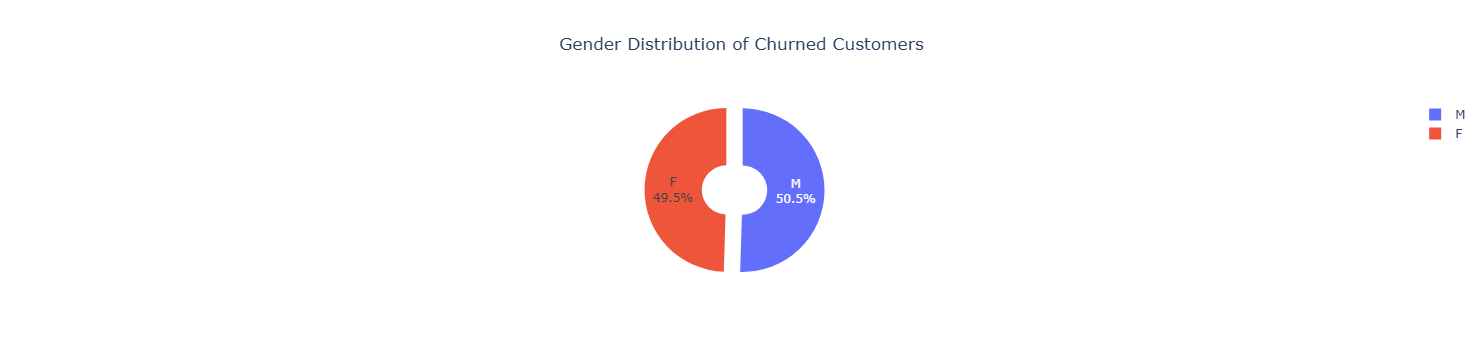

In [79]:
# Pie chart for Gender Distribution of Churned Customers
fig = plot_pie(churned_customers_df, 
               names_column='Gender', 
               title="Gender Distribution of Churned Customers")
fig.show()


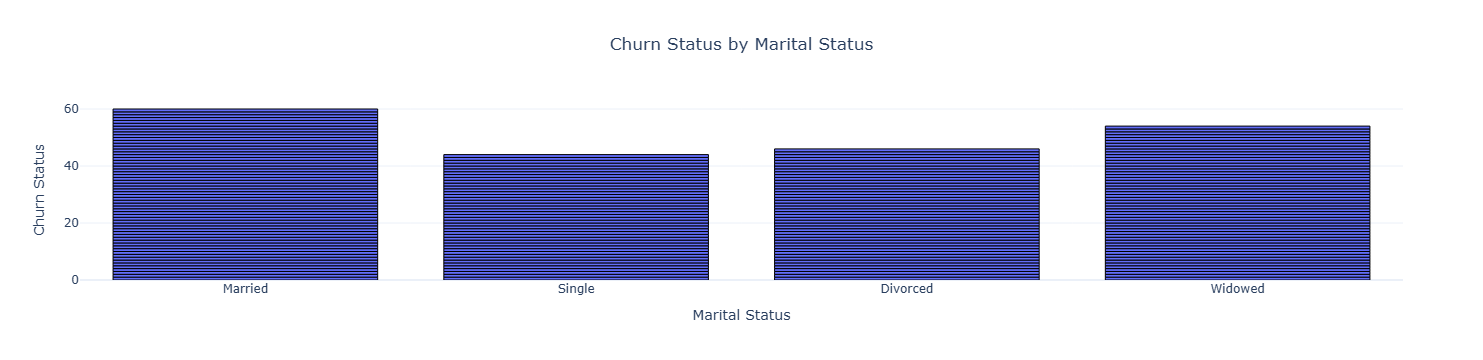

In [80]:
# Bar chart for Churn Status by Marital Status
fig = plot_bar(churned_customers_df, 
               x_column='MaritalStatus', 
               y_column='ChurnStatus', 
               title="Churn Status by Marital Status", 
               x_label="Marital Status", 
               y_label="Churn Status", 
               orientation='v')
fig.show()


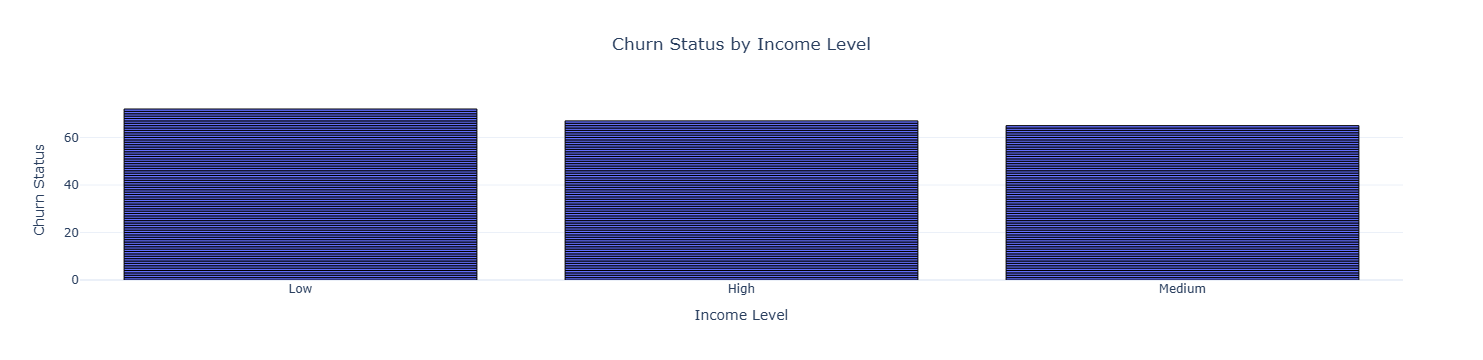

In [81]:
# Bar chart for Churn Status by Income Level
fig = plot_bar(churned_customers_df, 
               x_column='IncomeLevel', 
               y_column='ChurnStatus', 
               title="Churn Status by Income Level", 
               x_label="Income Level", 
               y_label="Churn Status", 
               orientation='v')
fig.show()


C:\Users\alina\AppData\Local\Temp\ipykernel_19792\3547493485.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\alina\anaconda3\Lib\site-packages\plotly\express\_core.py:1727: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\alina\anaconda3\Lib\site-packages\plotly\express\_core.py:1727: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\alina\anacon

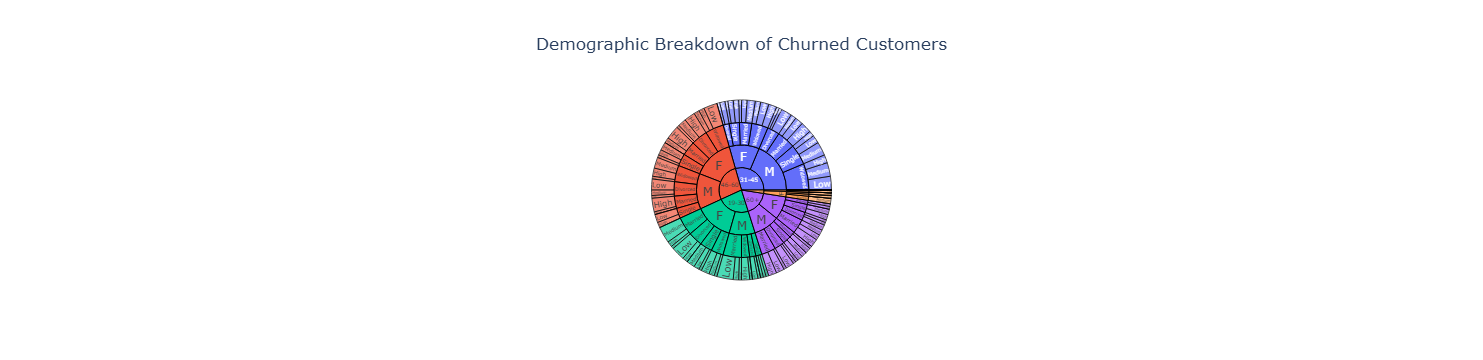

In [82]:
# Step 1: Create Age Groups (corrected number of labels)
churned_customers_df['AgeGroup'] = pd.cut(churned_customers_df['Age'], 
                                            bins=[0, 18, 30, 45, 60, 100], 
                                            labels=["0-18", "19-30", "31-45", "46-60", "60+"])

# Step 2: Create the Sunburst chart
fig = plot_sunburst(churned_customers_df, 
                    path_columns=['AgeGroup', 'Gender', 'MaritalStatus', 'IncomeLevel'], 
                    title="Demographic Breakdown of Churned Customers")
fig.show()


In [83]:
# Merging the customer demographics and churn status DataFrames
transaction_history_df = pd.merge(transaction_history_df, churn_status_df, on='CustomerID', how='left')

# Filtering where ChurnStatus is 1 (i.e., customers who have churned)
transaction_history_df = transaction_history_df[transaction_history_df['ChurnStatus'] == 1]

# Display the first few rows of the filtered DataFrame
print(transaction_history_df.head())


   CustomerID  TransactionID TransactionDate  AmountSpent ProductCategory  \
1           2           7250      2022-08-08        54.96        Clothing   
2           2           9660      2022-07-25       197.50     Electronics   
3           2           2998      2022-01-25       101.31       Furniture   
4           2           1228      2022-07-24       397.37        Clothing   
5           2           8903      2022-01-09       285.21     Electronics   

   ChurnStatus  
1            1  
2            1  
3            1  
4            1  
5            1  


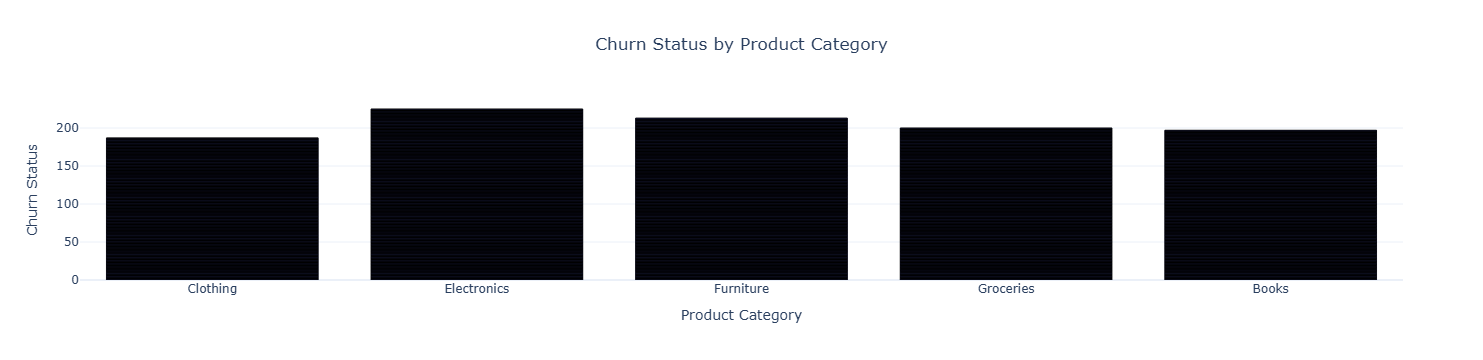

In [84]:
# Bar chart for Product Category and Churn Status
fig = plot_bar(transaction_history_df, 
               x_column='ProductCategory', 
               y_column='ChurnStatus', 
               title="Churn Status by Product Category", 
               x_label="Product Category", 
               y_label="Churn Status", 
               orientation='v')
fig.show()


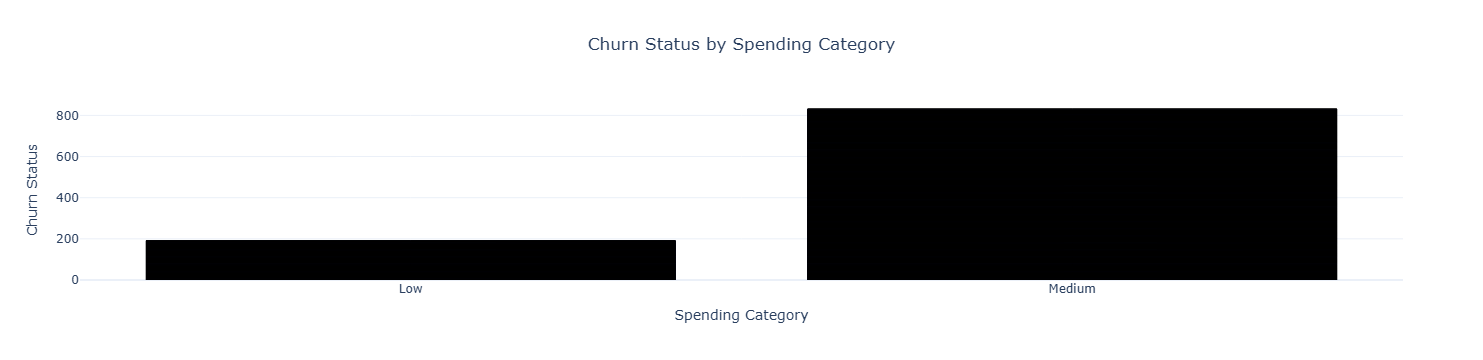

In [85]:
# Categorizing Amount Spent into bins (Low, Medium, High)
transaction_history_df['SpendingCategory'] = pd.cut(
    transaction_history_df['AmountSpent'],
    bins=[0, 100, 500, 1000, float('inf')],
    labels=["Low", "Medium", "High", "Very High"]
)

# Bar chart for Spending Category and Churn Status
fig = plot_bar(transaction_history_df, 
               x_column='SpendingCategory', 
               y_column='ChurnStatus', 
               title="Churn Status by Spending Category", 
               x_label="Spending Category", 
               y_label="Churn Status", 
               orientation='v')
fig.show()


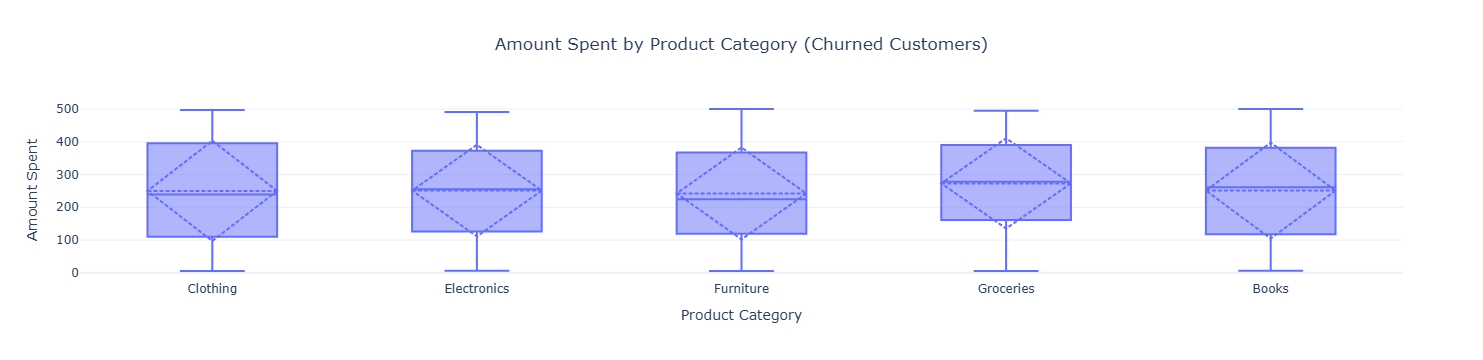

In [87]:
# Box plot for Amount Spent by Product Category
fig = plot_box(transaction_history_df, 
               x_column='ProductCategory', 
               y_column='AmountSpent', 
               title="Amount Spent by Product Category (Churned Customers)", 
               x_label="Product Category", 
               y_label="Amount Spent")
fig.show()


C:\Users\alina\anaconda3\Lib\site-packages\plotly\express\_core.py:1727: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\alina\anaconda3\Lib\site-packages\plotly\express\_core.py:1727: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



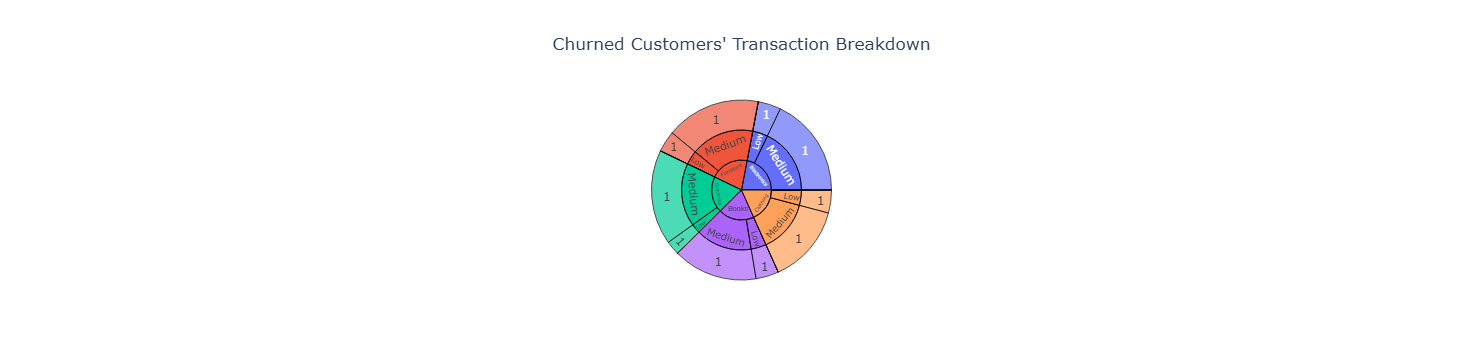

In [89]:
# Create the Sunburst chart for Churned Customers' Transactions
fig = plot_sunburst(transaction_history_df, 
                    path_columns=['ProductCategory', 'SpendingCategory', 'ChurnStatus'], 
                    title="Churned Customers' Transaction Breakdown")
fig.show()


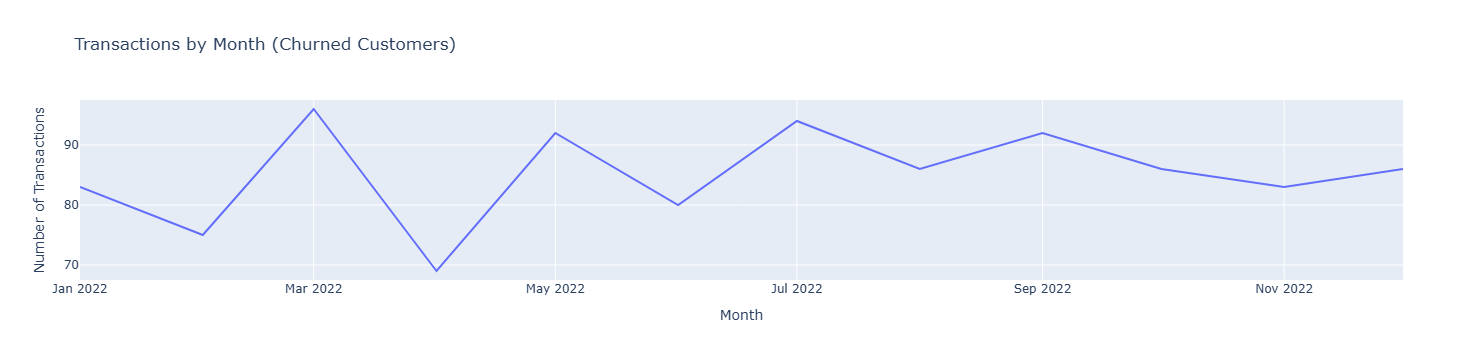

In [90]:
# Convert TransactionMonth from Period to string format
transaction_history_df['TransactionMonth'] = transaction_history_df['TransactionDate'].dt.to_period('M').astype(str)

# Aggregating the number of transactions by month
monthly_transactions = transaction_history_df.groupby('TransactionMonth').size()

# Line plot to visualize transaction trends over months
fig = px.line(monthly_transactions, x=monthly_transactions.index, y=monthly_transactions, title="Transactions by Month (Churned Customers)")
fig.update_layout(xaxis_title="Month", yaxis_title="Number of Transactions")
fig.show()


In [94]:
# Merging the customer demographics and churn status DataFrames
customer_service_df = pd.merge(customer_service_df, churn_status_df, on='CustomerID', how='left')

# Filtering where ChurnStatus is 1 (i.e., customers who have churned)
customer_service_df = customer_service_df[customer_service_df['ChurnStatus'] == 1]

# Display the first few rows of the filtered DataFrame
print(customer_service_df.head())


    CustomerID  InteractionID InteractionDate InteractionType  \
1            2           3329      2022-03-17         Inquiry   
6            8           4191      2022-04-29         Inquiry   
7            8           8937      2022-09-13        Feedback   
18          16           5761      2022-06-30         Inquiry   
19          16           9278      2022-09-08         Inquiry   

   ResolutionStatus  ChurnStatus  
1          Resolved            1  
6        Unresolved            1  
7        Unresolved            1  
18         Resolved            1  
19         Resolved            1  


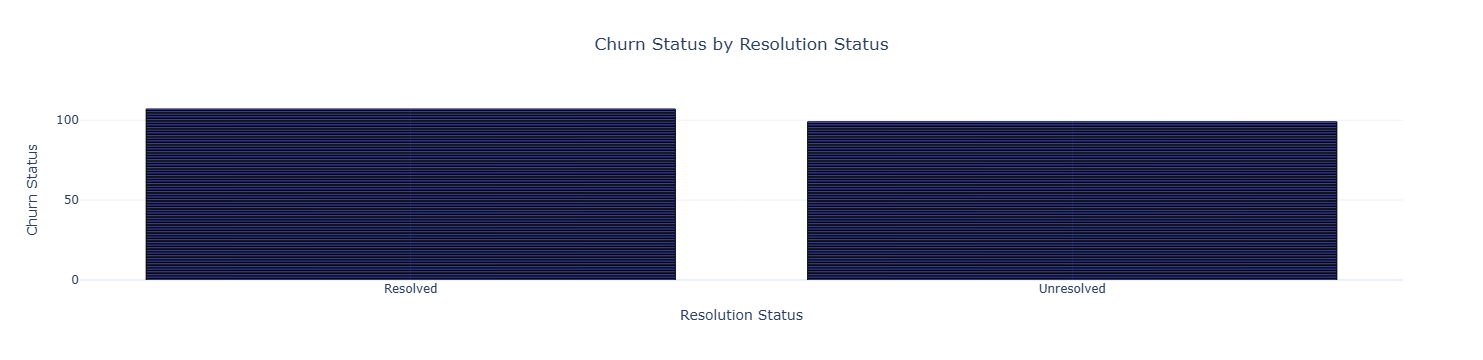

In [96]:
# Bar chart for Resolution Status and Churn Status
fig = plot_bar(customer_service_df, 
               x_column='ResolutionStatus', 
               y_column='ChurnStatus', 
               title="Churn Status by Resolution Status", 
               x_label="Resolution Status", 
               y_label="Churn Status", 
               orientation='v')
fig.show()


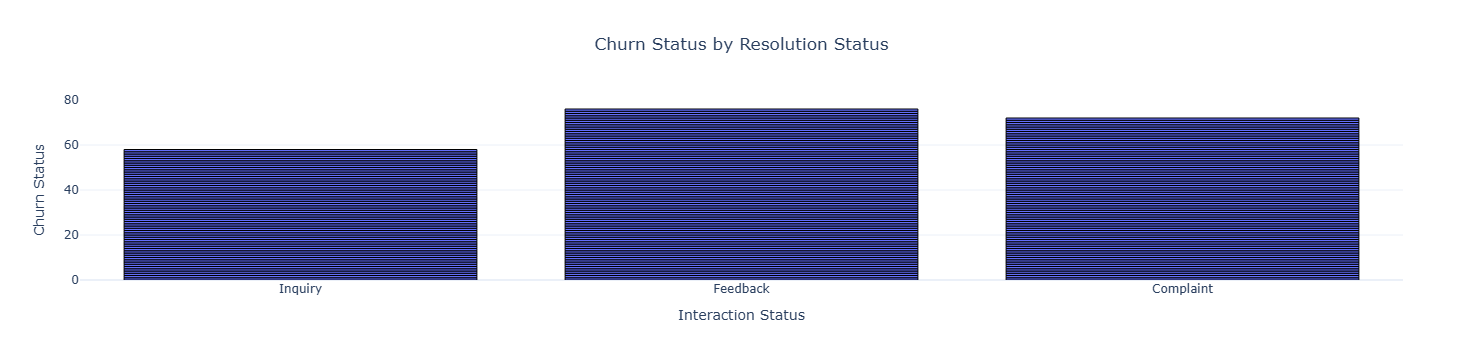

In [97]:
# Bar chart for Resolution Status and Churn Status
fig = plot_bar(customer_service_df, 
               x_column='InteractionType', 
               y_column='ChurnStatus', 
               title="Churn Status by Resolution Status", 
               x_label="Interaction Status", 
               y_label="Churn Status", 
               orientation='v')
fig.show()


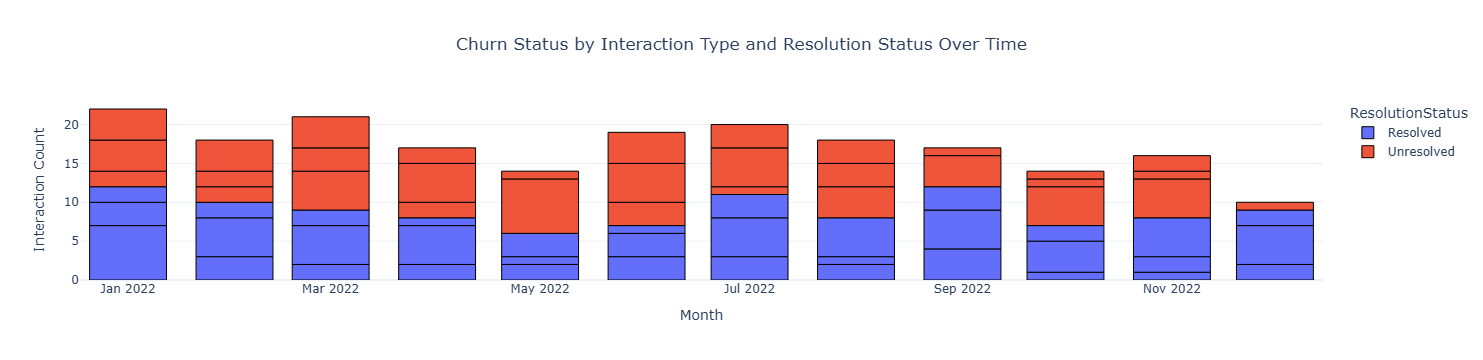

In [103]:
# Group by InteractionMonth, ChurnStatus, InteractionType, and ResolutionStatus
interaction_summary = churned_customer_service_df.groupby(['InteractionMonth', 'ChurnStatus', 'InteractionType', 'ResolutionStatus']) \
    .size().reset_index(name='InteractionCount')

# Stacked bar chart for InteractionType, ResolutionStatus, and ChurnStatus over Time (Month)
fig = plot_bar(interaction_summary, 
               x_column='InteractionMonth', 
               y_column='InteractionCount', 
               color_column='ResolutionStatus', 
               title="Churn Status by Interaction Type and Resolution Status Over Time", 
               x_label="Month", 
               y_label="Interaction Count", 
               orientation='v')
fig.show()


In [106]:
online_activity_df
# Merging the customer demographics and churn status DataFrames
online_activity_df = pd.merge(online_activity_df, churn_status_df, on='CustomerID', how='left')

# Filtering where ChurnStatus is 1 (i.e., customers who have churned)
online_activity_df = online_activity_df[online_activity_df['ChurnStatus'] == 1]

# Display the first few rows of the filtered DataFrame
print(online_activity_df.head())


    CustomerID LastLoginDate  LoginFrequency    ServiceUsage  ChurnStatus
1            2    2023-12-05               5         Website            1
7            8    2023-04-22              17  Online Banking            1
9           10    2023-01-13              29  Online Banking            1
15          16    2023-03-15              41  Online Banking            1
17          18    2023-11-24              37         Website            1


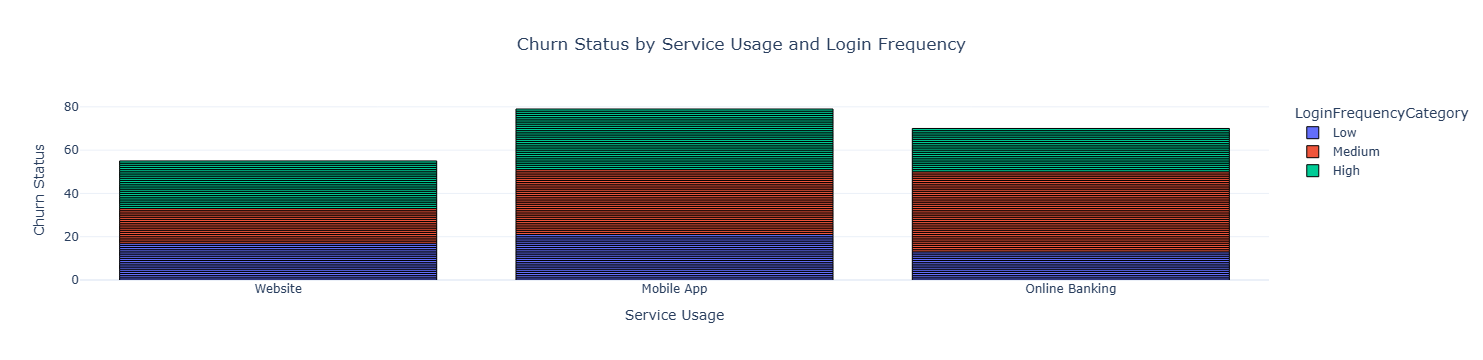

In [112]:
# Categorize LoginFrequency into bins (Low, Medium, High)
online_activity_df['LoginFrequencyCategory'] = pd.cut(
    online_activity_df['LoginFrequency'],
    bins=[0, 10, 30, 50, float('inf')],  # Example bins: [0-10, 11-30, 31-50, >50]
    labels=["Low", "Medium", "High", "Very High"]
)

# Now, let's plot the bar chart with LoginFrequency as color
fig = plot_bar(online_activity_df, 
               x_column='ServiceUsage', 
               y_column='ChurnStatus', 
               color_column='LoginFrequencyCategory', 
               title="Churn Status by Service Usage and Login Frequency", 
               x_label="Service Usage", 
               y_label="Churn Status", 
               orientation='v')
fig.show()


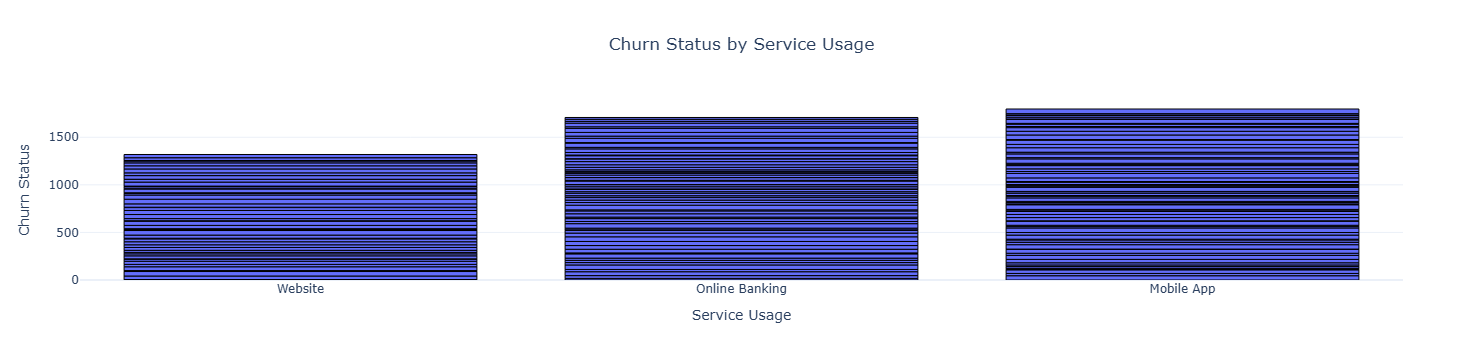